### importing libraries

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

### Read the data

In [3]:
df = pd.read_csv('news.csv')

### Shape and Head of Data

In [4]:
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Labels

In [5]:
labels = df.label

In [6]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### Splitting Data for Training And Testing

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state = 7)

### Initializing TfidfVectorizer

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

### Fit and Transform

In [9]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train)

In [10]:
tfidf_test = tfidf_vectorizer.transform(x_test)

### Initializing PassiveAggressiveClassifier

In [13]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

### Prediction

In [14]:
y_pred = pac.predict(tfidf_test)

### Calculating Accuracy

In [16]:
score = accuracy_score(y_test, y_pred)

In [19]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


### Confusion Matrix

In [29]:
c = confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

In [30]:
c

array([[590,  48],
       [ 42, 587]], dtype=int64)

In [31]:
import seaborn as sns

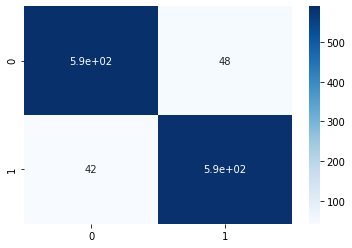

In [38]:
sns.heatmap(c, annot=True, cmap ='Blues')

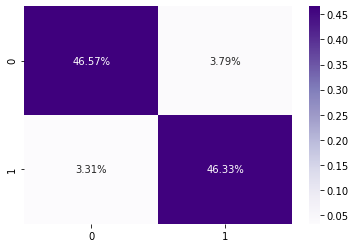

In [44]:
sns.heatmap(c/np.sum(c),  fmt = '.2%', annot=True, cmap ='Purples')